In [4]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 5)

#  Cargar el dataset
df = pd.read_csv("../data/netflix_titles.csv")

# Vista rápida
print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df = pd.read_csv("../data/netflix_titles.csv")
#Informacipin general del dataset
df.info()
#Estadística descriptiva
df.describe(include='all').T
#Revisión de valores nulos
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [ ]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Rellenar valores faltantes si es necesario
df['country'].fillna('Unknown', inplace=True)

# Eliminar filas sin tipo o título
df.dropna(subset=['type', 'title'], inplace=True)
# Quitar espacios al inicio y final de cada fecha
df['date_added'] = df['date_added'].astype(str).str.strip()

#Convertir a datetime ignorando errores (los valores que no pueda convertir los pondrá como NaT)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


C:\Users\ferna\AppData\Local\Temp\ipykernel_4260\3560608509.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


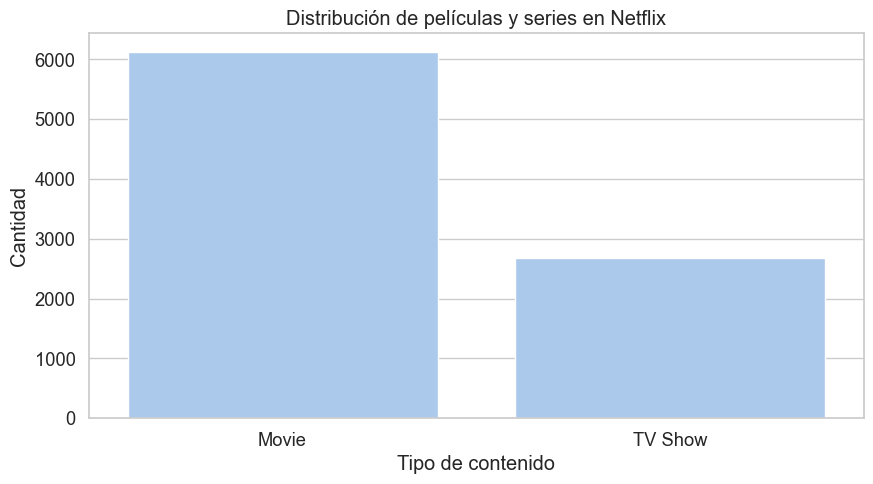

In [ ]:
#Análisis exploratorio (EDA)
sns.countplot(data=df, x='type')
plt.title("Distribución de películas y series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()


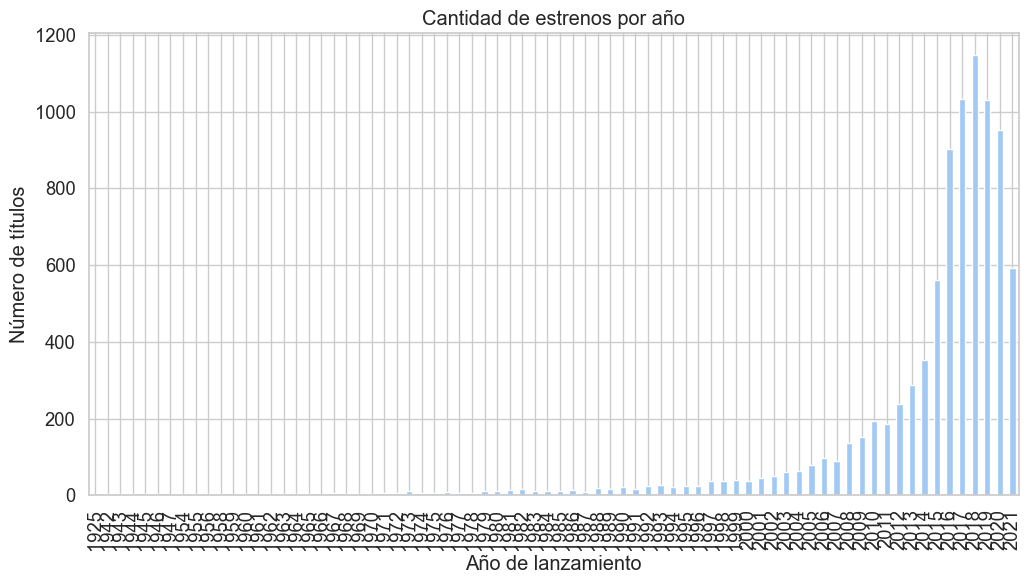

In [ ]:
#Evolucion del contenido a lo largo de los años
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Cantidad de estrenos por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de títulos")
plt.show()


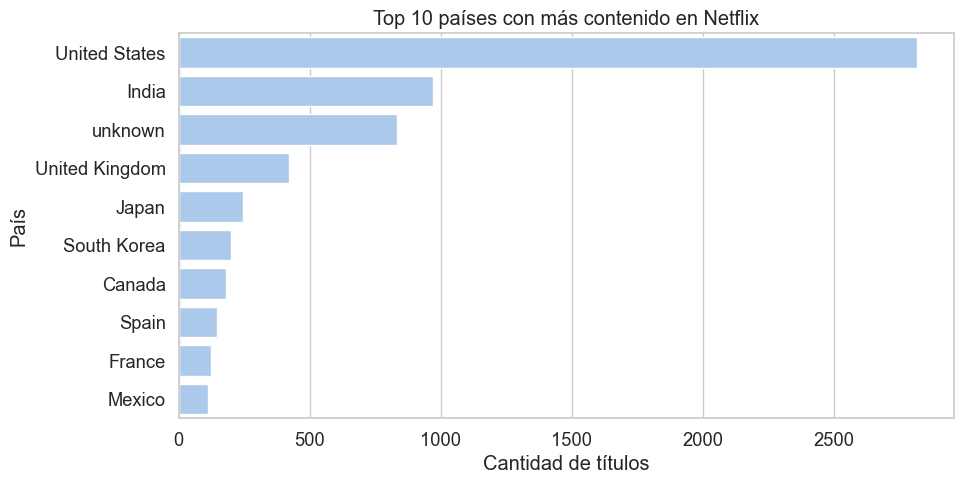

In [ ]:
#Países con más producciones
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 países con más contenido en Netflix")
plt.xlabel("Cantidad de títulos")
plt.ylabel("País")
plt.show()


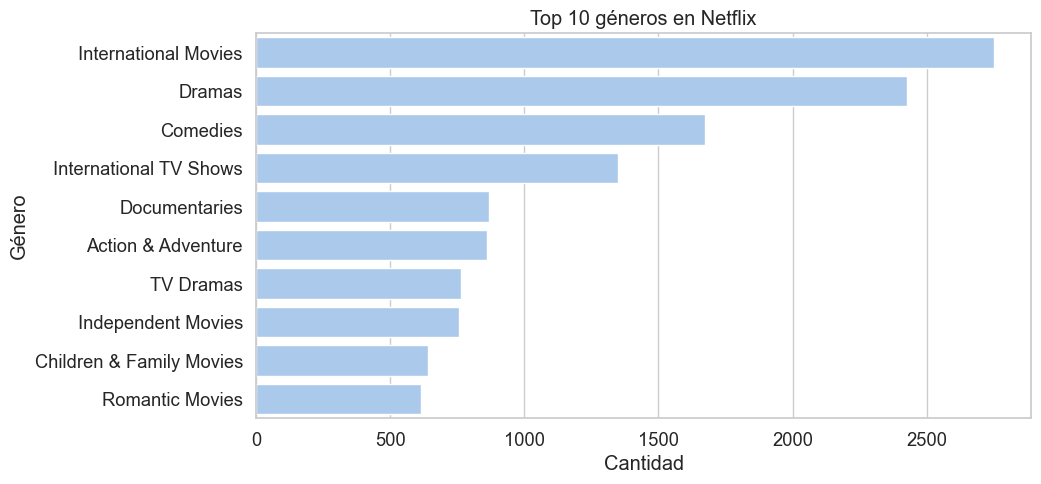

In [ ]:
#Generos más populares
from collections import Counter

all_genres = ','.join(df['listed_in'].dropna()).split(',')
genres_count = Counter([genre.strip() for genre in all_genres])

top_genres = pd.DataFrame(genres_count.most_common(10), columns=['Género', 'Cantidad'])

sns.barplot(data=top_genres, x='Cantidad', y='Género')
plt.title("Top 10 géneros en Netflix")
plt.show()


## Conclusiones

- Netflix tiene una clara predominancia de **películas** sobre series.
- La producción ha aumentado significativamente desde 2015, mostrando un fuerte crecimiento del catálogo.
- **Estados Unidos, India y Reino Unido** son los países con mayor cantidad de producciones.
- Los géneros más frecuentes incluyen **documentales, dramas y comedias**, reflejando la diversidad del catálogo.
- El análisis sugiere que Netflix ha apostado fuertemente por contenido internacional en los últimos años.

---
Este análisis demuestra mi capacidad para limpiar, explorar y comunicar insights clave a partir de datos reales.
